In [18]:
import pandas as pd
import numpy as np

na = np.random.rand(5)

print (na)

ser = pd.Series(na, index=['one','two','3','4', '5'])
                          
ser['3']

df =pd.DataFrame(np.random.rand(10,5))

df

[0.01896005 0.17909935 0.90090785 0.56682214 0.80357879]


,0,1,2,3,4
0,0.210122,0.781070,0.618025,0.632745,0.166670
1,0.723626,0.299354,0.502390,0.608813,0.877784
2,0.781907,0.410995,0.958193,0.357704,0.931113
3,0.847499,0.483405,0.898902,0.614402,0.617470
4,0.187358,0.155797,0.711087,0.258145,0.888268
5,0.206669,0.541021,0.548164,0.462471,0.198387
6,0.928972,0.799550,0.691491,0.656137,0.859092
7,0.459760,0.230165,0.628213,0.750916,0.736513
8,0.079946,0.720557,0.481332,0.947855,0.550741
9,0.096741,0.187131,0.827604,0.100721,0.415925


In [48]:
df = pd.read_csv('../Datasets/Automobile_data.csv')

#df.describe()

#df.dtypes

#df.columns

#'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
 #      'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
  #     'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
   #    'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
    #   'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
     #  'highway-mpg', 'price']

    
#df = df.drop(['symboling', 'normalized-losses'], axis=1)

#df.drop(df.columns[[0,1]], axis=1, inplace=True)

#df.iloc[[130]]

#df.iloc[:,[2,3,4,5]]

#df['avg-mpg'] =  (df['city-mpg'] + df['highway-mpg'] )/2



#df.loc[:, 'price'] = pd.to_numeric(df['price'], errors='coerce')
#df.dtypes

nan = df['horsepower'] == '?'

print(nan.value_counts())

df.loc[df['price'] == '?']


False    203
True       2
Name: horsepower, dtype: int64


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


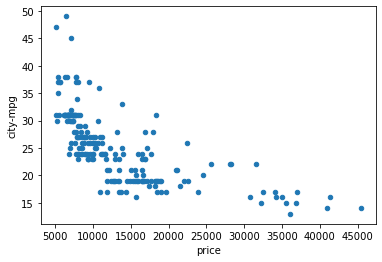

In [59]:
df = pd.read_csv('../Datasets/Automobile_data.csv', na_values={'price':["?","n.a"],
'stroke':["?","n.a"],
'horsepower':["?","n.a"],
'peak-rpm':["?","n.a"],
'average-mileage':["?","n.a"]})

df.iloc[[130]]

df.dtypes

df.to_csv('Auto_update.csv')

df_price_mpg = pd.read_csv("../Datasets/Automobile_data.csv", usecols=['price', 'city-mpg'], na_values={'price':["?","n.a"]})

from matplotlib import pyplot as plt


#df_price_mpg.plot()

df_price_mpg.plot.scatter(x='price', y ='city-mpg')

plt.show()




In [63]:
print(df['price'].max())
print(df['price'].idxmax())

max_price = df[['make', 'price']][df['price'] == df['price'].max()]

max_price

45400.0
74


,make,price
74,mercedes-benz,45400.0


In [68]:
car_man = df.groupby('make')

#['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 #'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 #'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 #'volvo']

print(pd.unique(df['make']))

toyota = car_man.get_group('toyota')

df['make'].value_counts()


['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

In [71]:
max_price_man = car_man[['make', 'price']].max()

max_price_man

df['avg-mpg'] = (df['city-mpg'] + df['highway-mpg'] )/2

avg_mpg = car_man[['make', 'avg-mpg']].mean()

avg_mpg.sort_values(by=['avg-mpg'], ascending=False, inplace=True)

avg_mpg

,avg-mpg
make,
chevrolet,43.666667
isuzu,33.500000
honda,32.923077
volkswagen,31.750000
plymouth,31.142857
dodge,31.055556
toyota,30.203125
nissan,29.972222
mazda,28.823529


In [74]:
cars_sorted = df.sort_values(by=['price', 'horsepower'], ascending = False)

cars_sorted.tail(25)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avgerage-mpg,avg-mpg
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,3.15,3.29,9.40,69.0,5200.0,31,37,6649.0,34.0,34.0
20,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,...,3.03,3.11,9.60,70.0,5400.0,38,43,6575.0,40.5,40.5
33,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,2.91,3.41,9.20,76.0,6000.0,30,34,6529.0,32.0,32.0
152,1,74,toyota,gas,std,four,hatchback,fwd,front,95.7,...,3.05,3.03,9.00,62.0,4800.0,31,38,6488.0,34.5,34.5
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,2.91,3.41,9.60,58.0,4800.0,49,54,6479.0,51.5,51.5
22,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,2.97,3.23,9.40,68.0,5500.0,31,38,6377.0,34.5,34.5
151,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,3.05,3.03,9.00,62.0,4800.0,31,38,6338.0,34.5,34.5
19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,3.03,3.11,9.60,70.0,5400.0,38,43,6295.0,40.5,40.5
24,1,148,dodge,gas,std,four,hatchback,fwd,front,93.7,...,2.97,3.23,9.40,68.0,5500.0,31,38,6229.0,34.5,34.5
120,1,154,plymouth,gas,std,four,hatchback,fwd,front,93.7,...,2.97,3.23,9.40,68.0,5500.0,31,38,6229.0,34.5,34.5


In [77]:
GermanCars = {'Company': ['Ford', 'Mercedes', 'BMV', 'Audi'], 'Price': [23845, 171995, 135925 , 71400]}
carsDf1 = pd.DataFrame.from_dict(GermanCars)

japaneseCars = {'Company': ['Toyota', 'Honda', 'Nissan', 'Mitsubishi '], 'Price': [29995, 23600, 61500 , 58900]}
carsDf2 = pd.DataFrame.from_dict(japaneseCars)

carsDf = pd.concat([carsDf1, carsDf2], keys=['Germany', "Japan"])

carsDf

Company   Price
Germany 0         Ford   23845
        1     Mercedes  171995
        2          BMV  135925
        3         Audi   71400
Japan   0       Toyota   29995
        1        Honda   23600
        2       Nissan   61500
        3  Mitsubishi    58900

In [83]:
Car_Price = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'Price': [23845, 17995, 135925 , 71400]}
carPriceDf = pd.DataFrame.from_dict(Car_Price)
carPriceDf.set_index('Company', inplace=True)

car_Horsepower = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'horsepower': [141, 80, 182 , 160]}
carsHorsepowerDf = pd.DataFrame.from_dict(car_Horsepower)
carsHorsepowerDf.set_index('Company', inplace=True)

carsDf = pd.concat([carPriceDf,carsHorsepowerDf], axis=1)

carsDf

,Price,horsepower
Company,,
Toyota,23845,141
Honda,17995,80
BMV,135925,182
Audi,71400,160
